In [1]:
import pandas as pd
import sys
from datetime import date, datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.insert(0,"...")
from nextbike.preprocessing.Preprocessor import Preprocessor

In [3]:
bremen= Preprocessor("/Users/dianagowalow/Desktop/PDS_Project/data")


In [4]:
Preprocessor.clean_dataset(bremen)

Cleaning data set...
Filtered for city of Bremen.
Duplicates of subset [datetime, bike number] dropped.
Index reset.
Order of columns rearranged.
Null values dropped.
Cleaned data set saved in data/processed as bremen_cleaned.csv.
Cleaning data sucessfully finished.


In [5]:
bremen_cleaned = Preprocessor._get_cleaned(bremen)

In [6]:
bremen_cleaned.info()
bremen_cleaned.head()
bremen_cleaned.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654495 entries, 0 to 654494
Data columns (total 13 columns):
datetime        654495 non-null datetime64[ns]
b_number        654495 non-null int64
b_bike_type     654495 non-null int64
p_spot          654495 non-null bool
p_place_type    654495 non-null int64
trip            654495 non-null object
p_uid           654495 non-null int64
p_bikes         654495 non-null int64
p_name          654495 non-null object
p_number        654495 non-null float64
p_bike          654495 non-null bool
p_lat           654495 non-null float64
p_lng           654495 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 56.2+ MB


datetime        186327
b_number           443
b_bike_type          2
p_spot               2
p_place_type         3
trip                 4
p_uid           157157
p_bikes             32
p_name            5973
p_number            79
p_bike               2
p_lat            25057
p_lng            85611
dtype: int64

In [7]:
Preprocessor.create_trips(bremen)

Creating Trips from cleaned bike pings...


Finished rows:: 100%|██████████| 654495/654495 [02:46<00:00, 3924.10it/s]


Trips data set saved in data/processed as trips.csv.
Creating trips from data completed successfully.


In [8]:
bremen_trips = pd.read_csv("/Users/dianagowalow/Desktop/PDS_Project/data/processed/trips.csv")

In [9]:
bremen_trips.head()
bremen_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232845 entries, 0 to 232844
Data columns (total 12 columns):
bike              232845 non-null int64
bike_type         232845 non-null int64
identification    232845 non-null int64
start_time        232845 non-null object
end_time          232845 non-null object
duration_sec      232845 non-null float64
start_lng         232845 non-null float64
start_lat         232845 non-null float64
end_lng           232845 non-null float64
end_lat           232845 non-null float64
start_place       232845 non-null float64
end_place         232845 non-null float64
dtypes: float64(7), int64(3), object(2)
memory usage: 21.3+ MB


In [10]:
bremen_trips = bremen_trips.sort_values(by=['start_time'], ascending=True)

In [11]:
bremen_trips.head()

,bike,bike_type,identification,start_time,end_time,duration_sec,start_lng,start_lat,end_lng,end_lat,start_place,end_place
81821,20685,71,12099440,2019-01-20 00:13:00,2019-01-20 00:23:00,600.0,8.812554,53.076481,8.804828,53.084196,0.0,0.0
53590,20626,71,10278649,2019-01-20 00:16:00,2019-01-20 04:47:00,16260.0,8.884911,53.078923,8.884911,53.078923,2985.0,2985.0
204560,20935,71,7873316,2019-01-20 00:35:00,2019-01-25 08:00:00,458700.0,8.816798,53.072448,8.811472,53.083167,0.0,2946.0
49030,20617,71,12099749,2019-01-20 00:40:00,2019-01-20 00:44:00,240.0,8.801623,53.067878,8.793217,53.064244,0.0,0.0
131464,20795,71,12099872,2019-01-20 00:47:00,2019-01-20 00:54:00,420.0,8.814744,53.084841,8.801135,53.094596,0.0,0.0


In [12]:
bremen_trips["start_time"] = pd.to_datetime(bremen_trips["start_time"])

In [13]:
for col in ['start_time']:
    bremen_trips['month'] = pd.DatetimeIndex(bremen_trips['start_time']).month
    bremen_trips['booking_date'] = bremen_trips.start_time.dt.date
    bremen_trips['weekdays'] = pd.DatetimeIndex(bremen_trips['start_time']).weekday


In [14]:
display(bremen_trips.head(),bremen_trips.tail())

,bike,bike_type,identification,start_time,end_time,duration_sec,start_lng,start_lat,end_lng,end_lat,start_place,end_place,month,booking_date,weekdays
81821,20685,71,12099440,2019-01-20 00:13:00,2019-01-20 00:23:00,600.0,8.812554,53.076481,8.804828,53.084196,0.0,0.0,1,2019-01-20,6
53590,20626,71,10278649,2019-01-20 00:16:00,2019-01-20 04:47:00,16260.0,8.884911,53.078923,8.884911,53.078923,2985.0,2985.0,1,2019-01-20,6
204560,20935,71,7873316,2019-01-20 00:35:00,2019-01-25 08:00:00,458700.0,8.816798,53.072448,8.811472,53.083167,0.0,2946.0,1,2019-01-20,6
49030,20617,71,12099749,2019-01-20 00:40:00,2019-01-20 00:44:00,240.0,8.801623,53.067878,8.793217,53.064244,0.0,0.0,1,2019-01-20,6
131464,20795,71,12099872,2019-01-20 00:47:00,2019-01-20 00:54:00,420.0,8.814744,53.084841,8.801135,53.094596,0.0,0.0,1,2019-01-20,6


,bike,bike_type,identification,start_time,end_time,duration_sec,start_lng,start_lat,end_lng,end_lat,start_place,end_place,month,booking_date,weekdays
220079,20965,71,26519958,2019-12-31 23:41:00,2019-12-31 23:49:00,480.0,8.871098,53.077498,8.872118,53.082471,0.0,0.0,12,2019-12-31,1
116087,20757,71,26520201,2019-12-31 23:44:00,2019-12-31 23:59:00,900.0,8.821334,53.081942,8.806207,53.078418,0.0,0.0,12,2019-12-31,1
209971,20946,71,26520104,2019-12-31 23:48:00,2019-12-31 23:55:00,420.0,8.779235,53.078581,8.790776,53.078867,2966.0,0.0,12,2019-12-31,1
123555,20776,71,26520101,2019-12-31 23:48:00,2019-12-31 23:55:00,420.0,8.779235,53.078581,8.790580,53.078867,2966.0,0.0,12,2019-12-31,1
113816,20751,71,26520148,2019-12-31 23:51:00,2019-12-31 23:57:00,360.0,8.815570,53.054449,8.811623,53.060347,0.0,0.0,12,2019-12-31,1


In [15]:
bremen_trips["duration_sec"].describe().astype(int)   # kann mir nicht so viel unter Sekunden vorstellen

count      232845
mean         9435
std        175228
min           120
25%           180
50%           420
75%           960
max      21399300
Name: duration_sec, dtype: int64

In [16]:
bremen_trips["duration_min"] = bremen_trips["duration_sec"]/60

In [17]:
bremen_trips["duration_min"].describe().astype(int)

count    232845
mean        157
std        2920
min           2
25%           3
50%           7
75%          16
max      356655
Name: duration_min, dtype: int64

wir haben hier deutliche Ausreißer. Das sieht man dran, dass 75% der Trips eine Dauer von <=16 Minuten haben, aber der mean bei 157 liegt, während Median bei 7 Minuten liegt

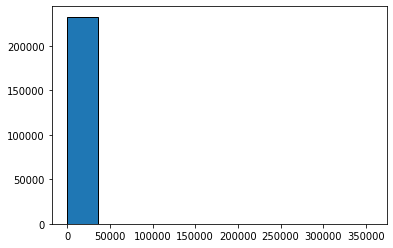

In [18]:
#Booking period (rented_minutes) for each booking -> frequency distribution
plt.hist(bremen_trips["duration_min"], bins = 10,edgecolor='k')
plt.show()

In [19]:
bremen_trips[bremen_trips["duration_min"]== 356655] ## Frage: Gab es hier einen Buchungsfehler?? Wer leiht ein Fahrrad 8 Monate aus

,bike,bike_type,identification,start_time,end_time,duration_sec,start_lng,start_lat,end_lng,end_lat,start_place,end_place,month,booking_date,weekdays,duration_min
217894,20961,71,7873893,2019-03-10 20:08:00,2019-11-13 12:23:00,21399300.0,8.805269,53.091262,8.779235,53.078581,0.0,2966.0,3,2019-03-10,6,356655.0


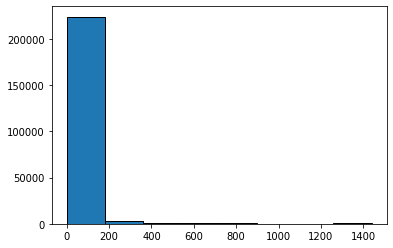

In [20]:
#schauen wir uns mal an, wie die Verteilung bei Ausleihen < 1 Tag sind
subsetRentedminutes = bremen_trips[bremen_trips["duration_min"].dropna(axis = 0) < 1440]  # 229892 entries
plt.hist(subsetRentedminutes["duration_min"], bins = 8 ,edgecolor='k')
plt.show()

Nur 2953 Trips sind länger als ein Tag lang. Mehr als 200.000 Trips sind < 200 Minuten

In [21]:
#Sum rented minutes a day
day_rented_minutes = (bremen_trips.groupby('booking_date')
                                 .duration_min.sum()
                              )
day_rented_minutes.describe().astype(int)



count        312
mean      117366
std       156680
min         3262
25%        33208
50%        69698
75%       130467
max      1748036
Name: duration_min, dtype: int64

Es scheint, dass wir fehlende Tage haben, denn es wurde nur an 312 Tagen des Jahres Fahrräder ausgeliehen? 
Auch hier scheint der Mittelwert gegenüber dem Median wenig robust -> rechtsschiefe Kurve... Ausreißer in Richtung viele gemietete Minuten

/Users/dianagowalow/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


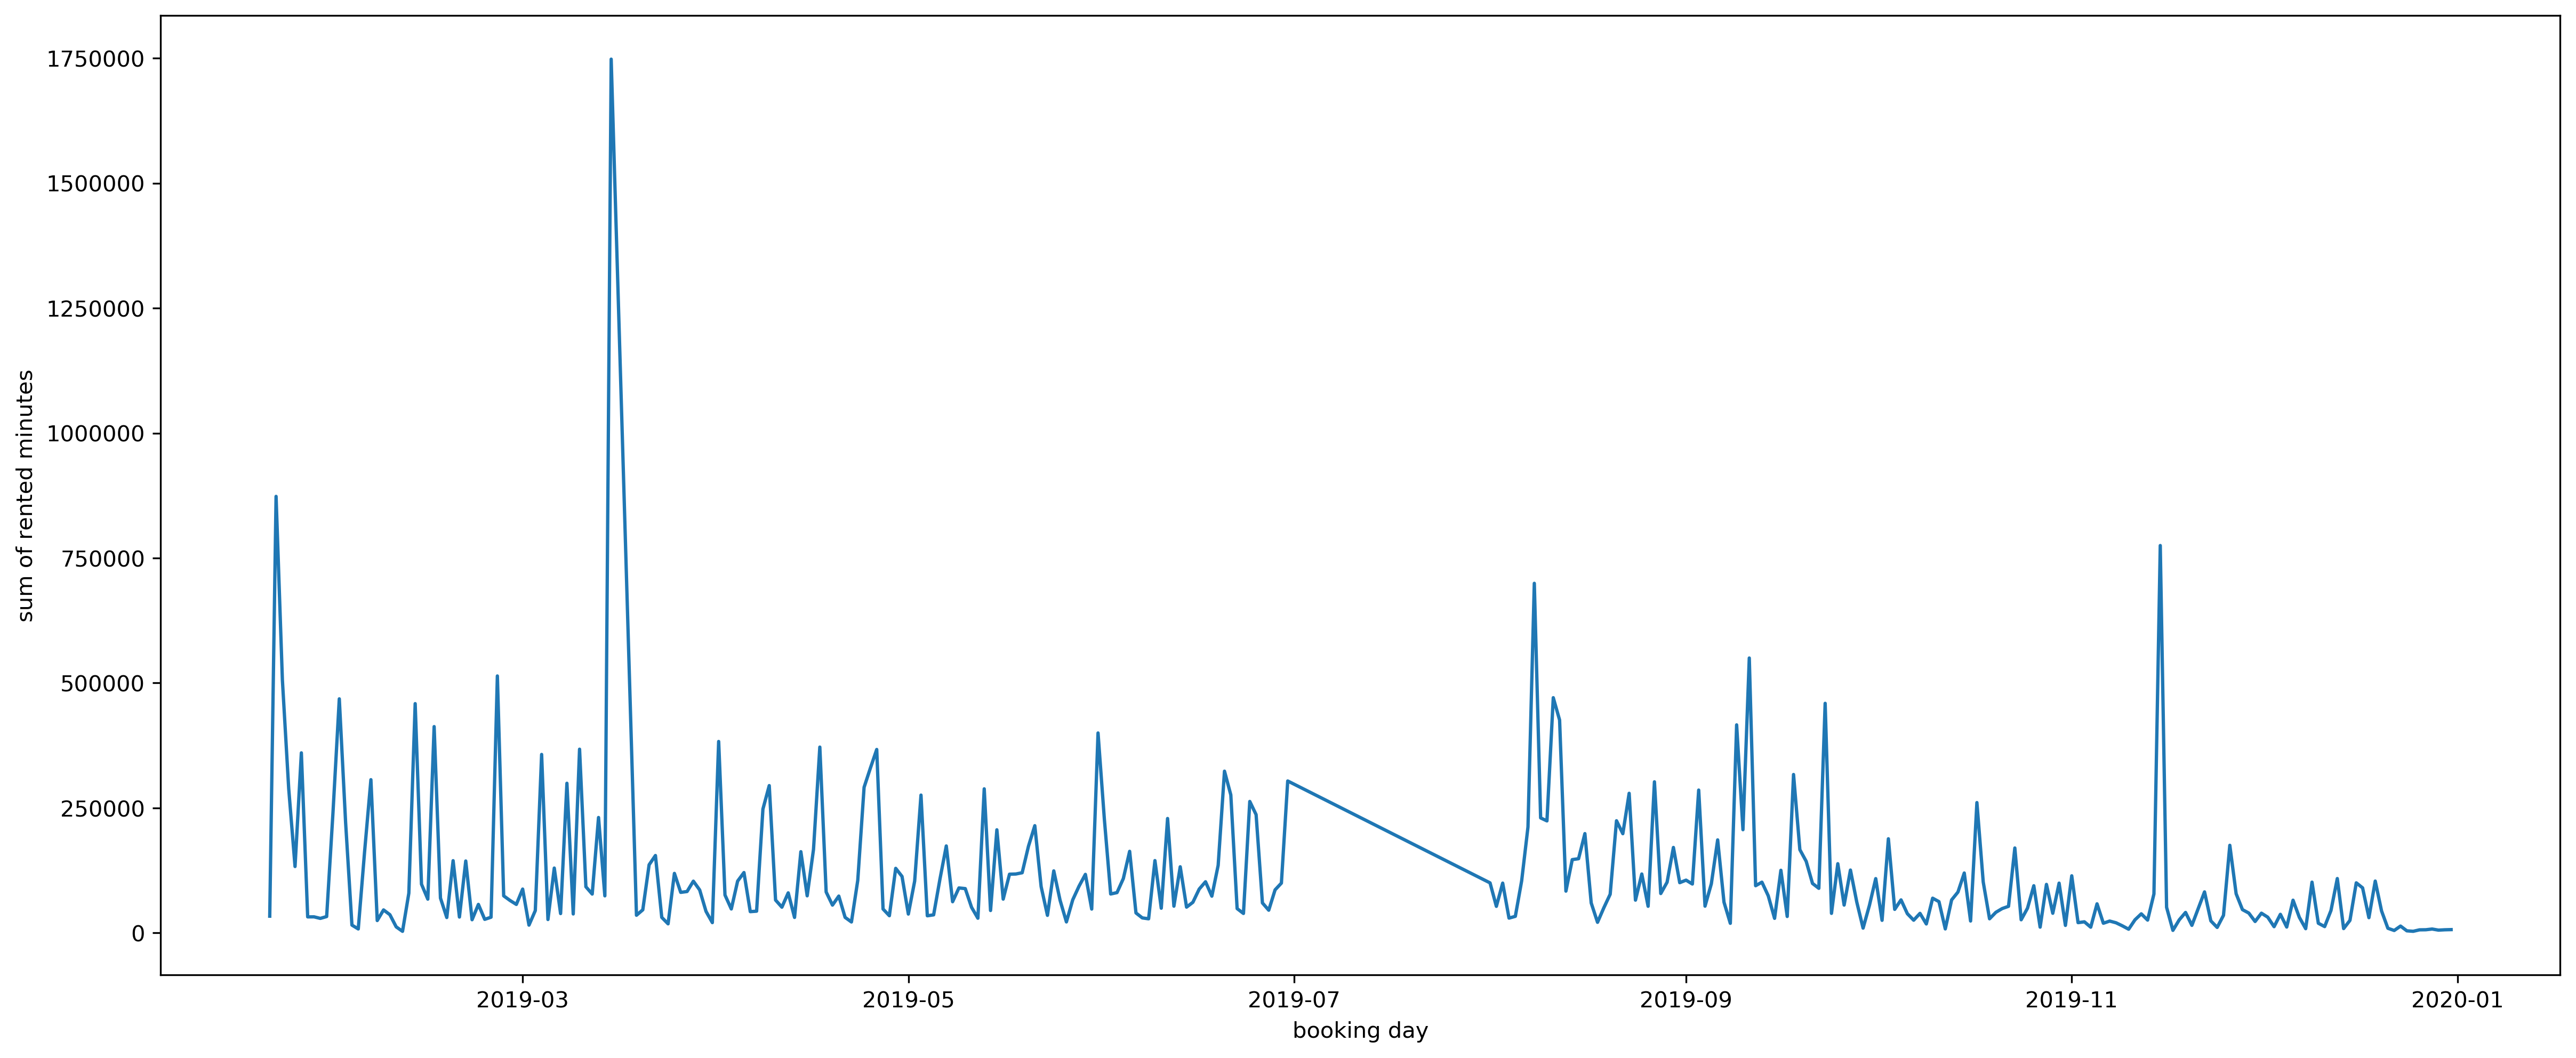

In [22]:
#Lineplot daily rented minutes

Fig_1 = plt.figure(figsize=(15,6),dpi = 300)
ax = Fig_1.add_axes([0,0,1,1])

ax.plot(day_rented_minutes)
ax.set_xlabel('booking day')
ax.set_ylabel('sum of rented minutes')

plt.show()

Das sieht irgendwie nicht aus wie ein typischer Graph für Fahrradausleihen... Jahreszeitenabhängige Ausleihe nicht erkennbar. Im Sommer fehlen irgendwie die Einträge.. vergleichen wir mal mit dem Subset von rented minutes

In [23]:
#Sum rented minutes a day <200 min duration
sub_day_rented_minutes = (subsetRentedminutes.groupby('booking_date')
                                 .duration_min.sum()
                              )
sub_day_rented_minutes.describe().astype(int)

count       312
mean      19859
std       11864
min        2399
25%       11317
50%       18003
75%       26266
max      129618
Name: duration_min, dtype: int64

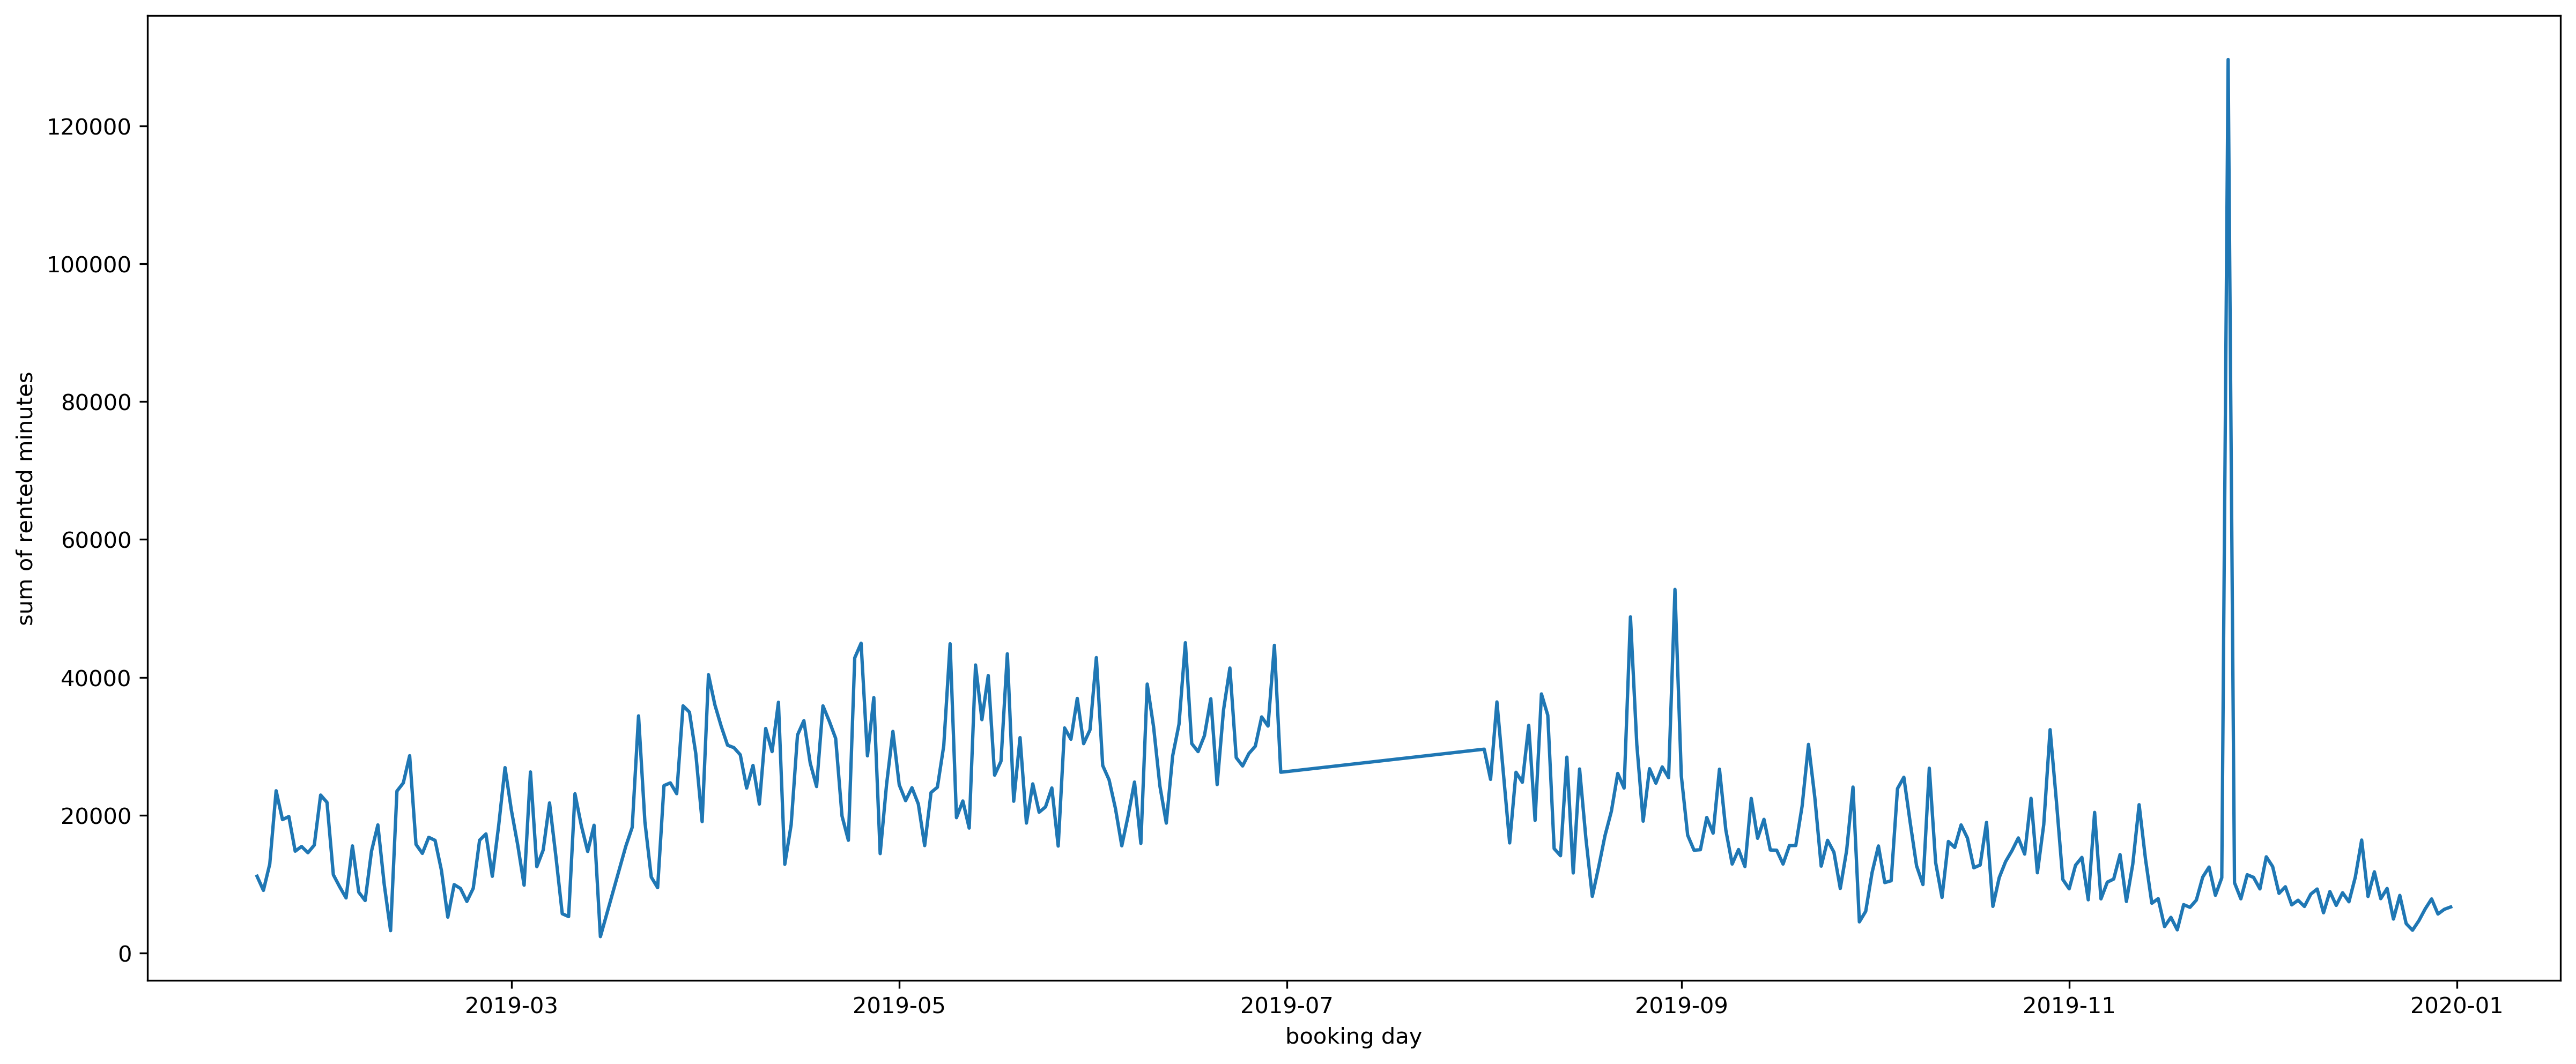

In [24]:
#Lineplot daily rented minutes subset

Fig_1 = plt.figure(figsize=(15,6),dpi = 300)
ax = Fig_1.add_axes([0,0,1,1])

ax.plot(sub_day_rented_minutes)
ax.set_xlabel('booking day')
ax.set_ylabel('sum of rented minutes')

plt.show()

sieht schon eher nach einem Anstieg Richtung Sommer aus..

- durchschnittliche Buchungsdauer
- number of Bookings per day

In [26]:
#Sum rented minutes a month
month_rented_minutes = (bremen_trips.groupby('month')
                                 .duration_min.sum()
                              )
month_rented_minutes.describe().astype(int)

count         11
mean     3328952
std      1240240
min      1003707
25%      2578762
50%      3508154
75%      4174175
max      5163608
Name: duration_min, dtype: int64

Hier sieht man wieder, das ein kompletter Monat fehlt

In [27]:
month_rented_minutes # Juli fehlt

month
1     3030373.0
2     3226887.0
3     4588846.0
4     4048118.0
5     3508154.0
6     3661621.0
8     5163608.0
9     4300232.0
10    2127151.0
11    1959777.0
12    1003707.0
Name: duration_min, dtype: float64

Text(0.5, 1.0, 'Bookings by weekdays')

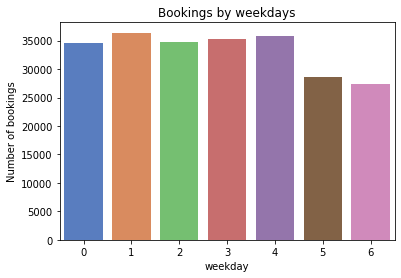

In [28]:
#Number of bookings by days of the week
weekdays = bremen_trips.groupby("weekdays").duration_min.count()
weekdays
ax = sns.barplot(x=weekdays.index, y=weekdays, palette="muted")
ax.set(ylabel='Number of bookings', xlabel='weekday')
ax.set_title('Bookings by weekdays')

Text(0.5, 1.0, 'Bookings by time of the day')

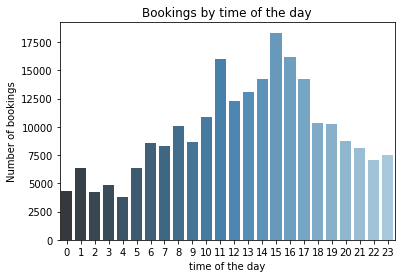

In [29]:
#Number of bookings by time
hour_day = bremen_trips.start_time.dt.hour.value_counts()
ax = sns.barplot(x=hour_day.index, y=hour_day, palette="Blues_d")
ax.set(ylabel='Number of bookings', xlabel='time of the day') 
ax.set_title('Bookings by time of the day')


-> hier ist überhaupt keine Rushhour Zeit zu erkennen oder ähnliches..

Text(0.5, 1.0, 'Number of bookings by time of the day and weekday')

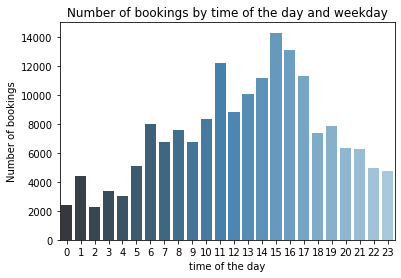

In [30]:
#Number of bookings by time of the day and weekday Anzahl
weekdays_group = bremen_trips[bremen_trips["weekdays"] < 5]
hour_of_day__weekday = weekdays_group.start_time.dt.hour.value_counts()
ax = sns.barplot(x=hour_of_day__weekday.index, y=hour_of_day__weekday, palette="Blues_d")
ax.set(ylabel='Number of bookings', xlabel='time of the day') 
ax.set_title('Number of bookings by time of the day and weekday')

Text(0.5, 1.0, 'Number of bookings by time of the day and weekend')

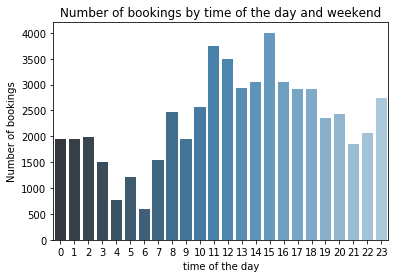

In [31]:
#Number of bookings by time and weekend 
weekend_group = bremen_trips[bremen_trips["weekdays"] > 4]
hour_of_day_weekend = weekend_group.start_time.dt.hour.value_counts()
ax = sns.barplot(x=hour_of_day_weekend.index, y=hour_of_day_weekend, palette="Blues_d")
ax.set(ylabel='Number of bookings', xlabel='time of the day') 
ax.set_title('Number of bookings by time of the day and weekend')



-> Das Wochenede scheint realistischer abgebildet zu sein

In [32]:
#Anzahl der Buchungen
display(hour_day.describe(),hour_of_day__weekday.describe(),hour_of_day_weekend.describe())

count       24.000000
mean      9701.875000
std       4041.832336
min       3782.000000
25%       6881.000000
50%       8730.500000
75%      12494.500000
max      18326.000000
Name: start_time, dtype: float64

count       24.000000
mean      7368.833333
std       3373.071116
min       2268.000000
25%       4935.000000
50%       7086.000000
75%       9141.750000
max      14324.000000
Name: start_time, dtype: float64

count      24.000000
mean     2333.041667
std       867.687956
min       594.000000
25%      1916.500000
50%      2386.000000
75%      2916.250000
max      4002.000000
Name: start_time, dtype: float64

Wenn man den Median vergleicht, sieht man eindeutig, dass innerhalb von 24h am Wochenede im Durschnitt deutlich weniger Fahrräder ausgeliehen werden
Insgesamt zeigen die Daten bisher, das etwas mit den Trips nicht ganz stimmen kann. Es fehlt ein Monat.. wenn man die Daten etwas besser trimmt, sieht man einen besseren Trend nach Monaten. Nachdem man das noch besser hingekriegt hat, kann man sich nochmal alles auf die Tage usw. runtergebrochen anschauen

In [33]:
#most used start_place
pd.set_option("display.max.rows", bremen_trips.shape[0]+1)
bremen_trips.start_place.value_counts()


0.0        158317
2946.0       6653
2910.0       2409
2977.0       1815
2976.0       1771
2975.0       1666
2963.0       1636
2939.0       1603
2940.0       1532
2945.0       1461
2912.0       1409
2985.0       1390
2911.0       1386
2961.0       1384
2953.0       1357
2992.0       1350
2956.0       1342
2944.0       1335
2990.0       1331
2937.0       1240
2987.0       1200
2936.0       1163
2951.0       1157
2943.0       1148
2966.0       1098
2988.0       1063
2959.0       1041
2958.0       1030
2913.0       1006
2965.0       1000
2915.0        996
2972.0        964
2949.0        933
2942.0        931
2989.0        923
2935.0        910
2931.0        906
2970.0        900
2950.0        896
2954.0        858
2971.0        856
2922.0        854
2933.0        843
2978.0        836
2930.0        824
2941.0        815
2916.0        780
2925.0        726
2957.0        725
2986.0        725
2938.0        687
2914.0        671
2952.0        669
2967.0        653
2973.0        636
2948.0    

In [34]:
#most used end_place
bremen_trips.end_place.value_counts()

0.0        162038
2946.0       6103
2910.0       2167
2976.0       1725
2977.0       1720
2939.0       1607
2975.0       1593
2963.0       1586
2940.0       1516
2945.0       1426
2912.0       1376
2953.0       1348
2956.0       1341
2992.0       1326
2911.0       1312
2985.0       1303
2944.0       1292
2961.0       1277
2990.0       1255
2937.0       1223
2943.0       1152
2987.0       1127
2951.0       1101
2966.0       1049
2959.0       1024
2988.0       1021
2936.0       1013
2915.0        983
2913.0        968
2972.0        943
2965.0        939
2949.0        927
2935.0        907
2958.0        907
2950.0        899
2970.0        884
2954.0        862
2971.0        847
2989.0        847
2931.0        839
2922.0        836
2978.0        833
2942.0        828
2930.0        805
2916.0        767
2933.0        762
2957.0        694
2941.0        689
2986.0        675
2925.0        671
2938.0        658
2914.0        628
2967.0        608
2947.0        591
2952.0        587
2921.0    

-> Hier wäre es gut zu sehen, was die Zahlen zu bedeuten haben, damit man das auf anhieb besser versteht.

In [35]:
#most popular roads: start_place zu end_place
most_pr = (
    bremen_trips.groupby(['start_place', 'end_place'])
      .agg({'duration_min':['count','min','max','mean','median','std','var']})
      .reset_index().sort_values(('duration_min','count'), ascending=False)
)
most_pr.head(n=10)



start_place end_place duration_min                                     \
                                  count  min       max         mean median   
0            0.0       0.0       136526  2.0  204830.0    51.827286    7.0   
981       2946.0       0.0         3632  2.0   41121.0    82.987610   12.0   
36           0.0    2946.0         2886  2.0  217282.0  2287.331947   18.0   
1012      2946.0    2946.0         1974  2.0    1418.0    43.440729    6.0   
773       2939.0    2939.0         1346  2.0    1284.0    10.441308    2.0   
79        2910.0       0.0         1309  2.0   19746.0    81.661574   11.0   
1207      2953.0    2953.0         1204  2.0     839.0     9.824751    2.0   
1286      2956.0    2956.0         1202  2.0     742.0     8.579035    2.0   
1880      2976.0    2976.0         1129  2.0     850.0    24.620018    2.0   
1843      2975.0    2975.0         1123  2.0    1026.0    12.408727    2.0   

                                 
              std           var  
0     1065.786698  1.135901e+06  
981    764.557753  5.845486e+05  
36    9324.183159  8.694039e+07  
1012    88.913252  7.905566e+03  
773     61.628856  3.798116e+03  
79     690.944430  4.774042e+05  
1207    50.704054  2.570901e+03  
1286    41.244816  1.701135e+03  
1880    74.837661  5.600676e+03  
1843    56.863954  3.233509e+03

In [49]:
# Most popular zones
bremen_trips.start_place.value_counts()
df_origin_freq = bremen_trips.start_place.value_counts().reset_index()
df_origin_freq.rename(
    columns={
        "index": "rental_zone",
        "start_place": "start",
    },
    inplace=True
)
df_origin_freq
df_origin_freq.columns = ['rental_zone','start']
df_dest_freq = bremen_trips.end_place.value_counts().reset_index()
df_dest_freq.rename(
    columns={
        "index": "rental_zone",
        "start_place": "end",
    },
    inplace=True
)
df_dest_freq.columns = ['rental_zone','end']

popular_zones_merged = pd.merge(df_origin_freq, df_dest_freq, on='rental_zone')
popular_zones_merged['diff'] = popular_zones_merged.end - popular_zones_merged.start
popular_zones_merged

,rental_zone,start,end,diff
0,0.0,158317,162038,3721
1,2946.0,6653,6103,-550
2,2910.0,2409,2167,-242
3,2977.0,1815,1720,-95
4,2976.0,1771,1725,-46
5,2975.0,1666,1593,-73
6,2963.0,1636,1586,-50
7,2939.0,1603,1607,4
8,2940.0,1532,1516,-16
9,2945.0,1461,1426,-35


In [50]:
popular_zones_merged.sort_values('diff').head()

,rental_zone,start,end,diff
1,2946.0,6653,6103,-550
2,2910.0,2409,2167,-242
21,2936.0,1163,1013,-150
60,2962.0,526,398,-128
45,2941.0,815,689,-126


In [51]:
# High bicycle supply
popular_zones_merged.sort_values('diff', ascending=False).head()

,rental_zone,start,end,diff
0,0.0,158317,162038,3721
76,2917.0,98,115,17
7,2939.0,1603,1607,4
23,2943.0,1148,1152,4
39,2954.0,858,862,4
